In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualizing the data

In [2]:
FILE_NAME = "PQ2MON - Orders - Weeks -1 to -109 (1).xls.xlsx"
DF = pd.read_excel(FILE_NAME)
DF

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23864,Spot,Traffic Tech,ROAD,Standard,DRY,PQ2MON,BC2VAN,"ST LAURENT,PQ/IL to DELTA,BC/",2020-06-18,2020-06-22,4192727,0
23865,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-18,4074001,0
23866,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-20,4073978,0
23867,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-13,2020-02-18,4074019,0


In [3]:
from collections import Counter

def getSortedCounter(my_list,cut_off=5,desc=True,others=True):
    c = dict(sorted(Counter(my_list).items(), key=lambda x: x[1], reverse = desc))
    if cut_off and cut_off < len(c):
        others_cnt = sum(list(c.values())[cut_off:])
        c = dict(list(c.items())[:cut_off])
        if others:
            c["Others"] = others_cnt
    return c

def getSortedCounterDf(df,col,cut_off=5):
    c = getSortedCounter(df[col],cut_off=cut_off)
    df = pd.DataFrame(columns=[col,"count"])
    df[col] = [str(key) for key in c.keys()]
    df["count"] = c.values()
    return df

def sorted_bar_plot(df,col,cut_off=5):
    df_cnt = getSortedCounterDf(df,col,cut_off)
    sns.barplot(data=df_cnt,y=col,x="count")
    plt.show()


def pie_plot(my_list):
    c = getCounter(my_list,desc=True)
    labels = c.keys()
    sizes = [i/len(my_list) for i in c.values()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,counterclock = False)
    ax1.axis('equal')
    plt.show()
    

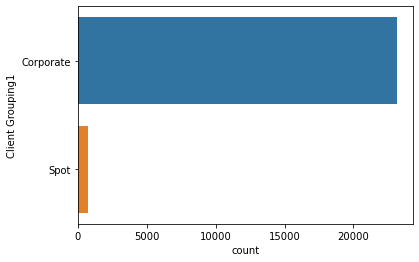

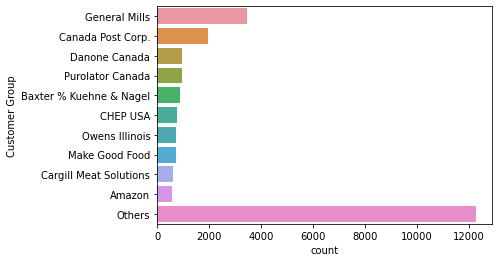

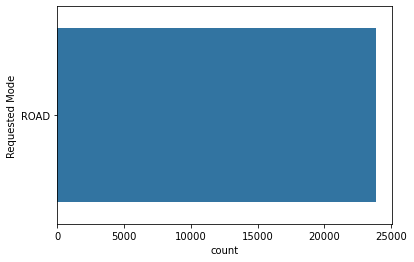

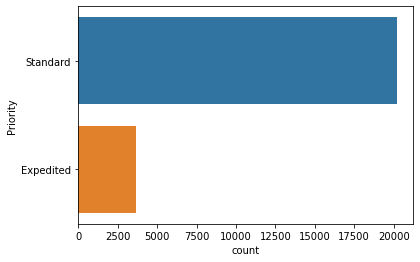

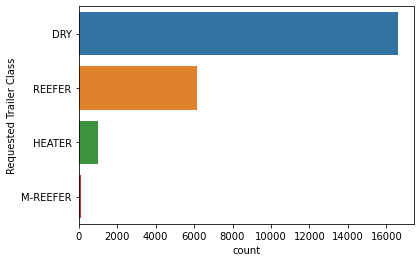

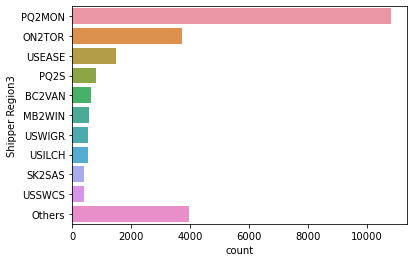

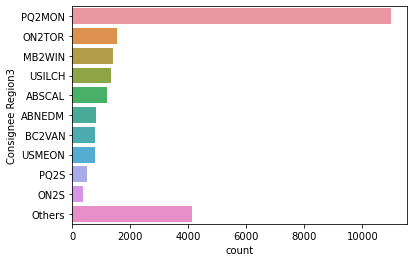

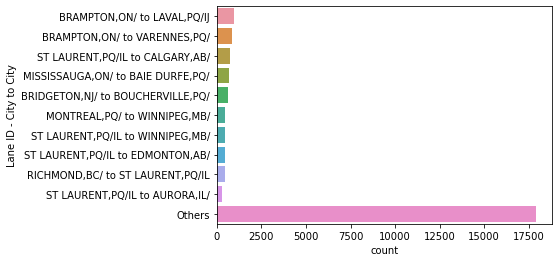

In [4]:
for col in DF.columns[:-4]:
    sorted_bar_plot(DF,col,10)

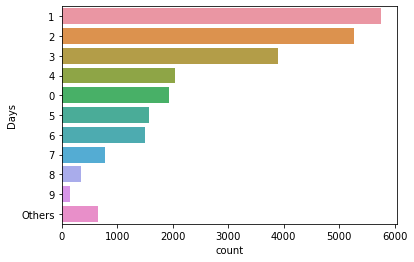

In [5]:
df = DF['Completion Date'] - DF['Start Date']
df = pd.DataFrame([item.days for item in df],columns=["Days"])
sorted_bar_plot(df,"Days",10)

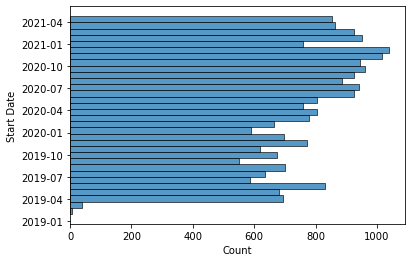

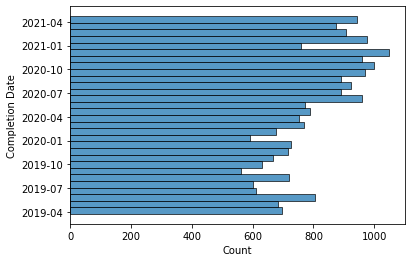

In [6]:
col = DF["Start Date"]
sns.histplot(data=DF,y=col)
plt.show()
col = DF["Completion Date"]
sns.histplot(data=DF,y=col)
plt.show()

# Preprocessing the Data

In [ ]:
## Clean data (only leaving rows with PQ and relevant columns)

In [149]:
DF_PQ = DF[DF['Consignee Region3'].str.contains('PQ') | DF['Shipper Region3'].str.contains('PQ')]
DF_CLEAN = DF_PQ.copy().drop(columns=["Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"])
DF_CLEAN

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [ ]:
# Calculate imbalance, daily and cumulatively. Imbalance = Inbound - Outbound

In [241]:
df_start = DF_CLEAN['Start Date'].value_counts().sort_index(axis=0)
df_end = DF_CLEAN['Completion Date'].value_counts().sort_index(axis=0)
df_combine = pd.concat([df_start, df_end],axis=1).fillna(0, downcast='infer').rename(columns={"Start Date": "Outbound", "Completion Date": "Inbound"})
df_combine["Imbalance"] = df_combine["Inbound"] - df_combine["Outbound"]
df_combine["cImbalance"] = df_combine["Imbalance"].cumsum()
df_combine

,Outbound,Inbound,Imbalance,cImbalance
2019-01-31,1,0,-1,-1
2019-02-01,1,0,-1,-2
2019-02-04,3,0,-3,-5
2019-03-13,2,0,-2,-7
2019-03-19,5,0,-5,-12
...,...,...,...,...
2021-04-20,36,44,8,-94
2021-04-21,28,46,18,-76
2021-04-22,21,54,33,-43
2021-04-23,12,44,32,-11


In [242]:
std = df_combine["Imbalance"].std()
mean_imb = df_combine["Imbalance"].mean()
mean_cimb = df_combine["cImbalance"].mean()

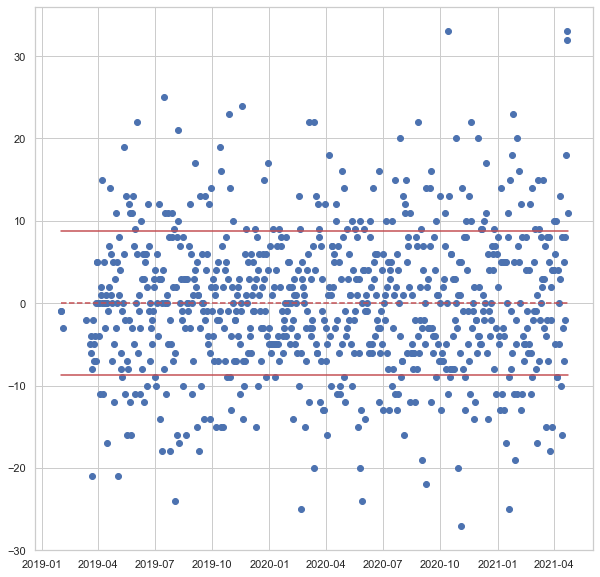

In [243]:
firstDate = min(df_combine.index)
lastDate = max(df_combine.index)
plt.figure(figsize=(10,10))
plt.plot(df_combine.index,df_combine["Imbalance"],'bo')
plt.plot([firstDate,lastDate],[mean_imb,mean_imb],'r--')
plt.plot([firstDate,lastDate],[std,std],'r-')
plt.plot([firstDate,lastDate],[-std,-std],'r-')

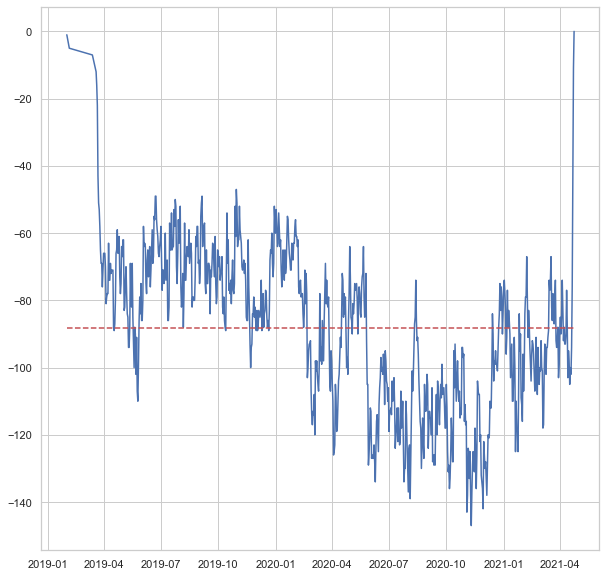

In [244]:
plt.figure(figsize=(10,10))
plt.plot(df_combine["cImbalance"])
plt.plot([firstDate,lastDate],[mean_cimb,mean_cimb],'r--')

In [240]:
df_combine.tail(20)

,Outgoing,Incoming,Imbalance,cImbalance
2021-04-05,38,48,10,-74
2021-04-06,47,38,-9,-83
2021-04-07,49,40,-9,-92
2021-04-08,39,43,4,-88
2021-04-09,46,41,-5,-93
2021-04-10,18,18,0,-93
2021-04-11,9,12,3,-90
2021-04-12,38,51,13,-77
2021-04-13,45,35,-10,-87
2021-04-14,49,33,-16,-103


## Extracting sample data to work with

In [259]:
startDate = pd.Timestamp(2020,1,1,0)
endDate = pd.Timestamp(2020,1,31,0)

df_count = df_combine[(df_combine.index >= startDate) & (df_combine.index <= endDate)]
df_count

,Outbound,Inbound,Imbalance,cImbalance
2020-01-01,4,1,-3,-60
2020-01-02,22,29,7,-53
2020-01-03,30,25,-5,-58
2020-01-04,12,6,-6,-64
2020-01-05,8,9,1,-63
2020-01-06,33,42,9,-54
2020-01-07,29,24,-5,-59
2020-01-08,33,28,-5,-64
2020-01-09,29,31,2,-62
2020-01-10,38,29,-9,-71


In [287]:
cond1 = (DF_CLEAN["Start Date"] >= startDate) & (DF_CLEAN["Start Date"] <= endDate)
cond2 = (DF_CLEAN["Completion Date"] >= startDate) & (DF_CLEAN["Completion Date"] <= endDate)
df_sched = DF_CLEAN[cond1|cond2]
df_sched.sort_values(by="Completion Date")

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
20765,Standard,REEFER,PQ2MON,ON2TOR,2020-01-01,2020-01-01
1345,Standard,REEFER,ON2TOR,PQ2MON,2019-12-31,2020-01-02
6205,Standard,DRY,ON2TOR,PQ2MON,2019-12-30,2020-01-02
6206,Standard,DRY,ON2TOR,PQ2MON,2019-12-31,2020-01-02
22820,Expedited,HEATER,PQ2MON,ABSCAL,2019-12-30,2020-01-02
...,...,...,...,...,...,...
10995,Standard,HEATER,PQ2MON,MB2WIN,2020-01-30,2020-02-06
4075,Standard,REEFER,USSWCS,PQ2MON,2020-01-31,2020-02-06
23279,Standard,DRY,PQ2MON,USSCTN,2020-01-31,2020-02-07
744,Standard,DRY,SK2SAS,PQ2MON,2020-01-30,2020-02-07


In [289]:
cond1 = (df_sched["Start Date"] >= startDate) & (df_sched["Start Date"] <= endDate)
cond2 = (df_sched["Completion Date"] >= startDate) & (df_sched["Completion Date"] <= endDate)
assert(pd.Series(Counter(df_sched["Start Date"][cond1])).sort_index().equals(df_count["Outbound"]))
assert(pd.Series(Counter(df_sched["Completion Date"][cond2])).sort_index().equals(df_count["Inbound"]))

## Draft / Deprecated codes

In [8]:
REGIONS = ['PQ2MON','PQ2N','PQ2OTT','PQ2QUE','PQ2S','PQ2C']
DF_CLEAN = DF.copy()
for i in range(len(DF_CLEAN)):
    DF_CLEAN.loc[i,"PQ"] = (DF_CLEAN.loc[i,"Shipper Region3"] in REGIONS) or (DF_CLEAN.loc[i,"Consignee Region3"] in REGIONS)

DF_CLEAN = DF_CLEAN[DF_CLEAN["PQ"]==True].drop(columns=["PQ","Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"])
DF_CLEAN

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [9]:
df_time = DF_CLEAN[DF_CLEAN['Completion Date'] < pd.Timestamp(2019,4,1,0)].sort_values(by='Start Date')
df_time

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
15076,Standard,DRY,USSES,PQ2MON,2019-01-31,2019-03-25
15077,Standard,DRY,USSES,PQ2MON,2019-02-04,2019-03-24
6850,Standard,DRY,ON2TOR,PQ2MON,2019-03-13,2019-03-26
3592,Standard,DRY,USSEN,PQ2MON,2019-03-19,2019-03-25
19618,Standard,REEFER,PQ2MON,BC2VAN,2019-03-19,2019-03-24
...,...,...,...,...,...,...
18663,Standard,REEFER,PQ2MON,ON2TOR,2019-03-29,2019-03-30
22913,Expedited,HEATER,PQ2MON,MB2WIN,2019-03-29,2019-03-31
2213,Expedited,DRY,ABSCAL,PQ2MON,2019-03-29,2019-03-31
7943,Standard,REEFER,PQ2MON,ON2TOR,2019-03-30,2019-03-31


In [11]:
df_time["Start Date"].value_counts()

2019-03-26    29
2019-03-25    28
2019-03-27    25
2019-03-22    21
2019-03-28    17
2019-03-24     9
2019-03-29     9
2019-03-23     7
2019-03-21     6
2019-03-19     5
2019-03-20     4
2019-03-30     2
2019-01-31     1
2019-03-13     1
2019-02-04     1
Name: Start Date, dtype: int64

In [12]:
df_time["Completion Date"].value_counts()

2019-03-28    32
2019-03-27    31
2019-03-29    25
2019-03-26    24
2019-03-25    23
2019-03-30    13
2019-03-31    10
2019-03-24     7
Name: Completion Date, dtype: int64

In [13]:
df = DF_CLEAN.copy()
date = pd.Timestamp(2019,3,27,0)
cond1 = df.loc[:,"Start Date"] == date
cond2 = df.loc[:,"Completion Date"] == date
df = df.where(cond2).append(df_time.where(cond1)).drop_duplicates(keep='first').dropna()
df

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
655,Standard,DRY,PQ2MON,USMEON,2019-03-25,2019-03-27
2209,Expedited,DRY,ABSCAL,PQ2MON,2019-03-25,2019-03-27
3040,Standard,REEFER,ABSRUR,PQ2MON,2019-03-23,2019-03-27
3126,Standard,REEFER,ON2S,PQ2MON,2019-03-25,2019-03-27
3130,Standard,REEFER,ON2S,PQ2MON,2019-03-26,2019-03-27
3151,Standard,REEFER,ON2TOR,PQ2MON,2019-03-26,2019-03-27
3353,Standard,REEFER,ON2TOR,PQ2MON,2019-03-25,2019-03-27
4266,Standard,REEFER,PQ2MON,ON2TOR,2019-03-26,2019-03-27
5883,Standard,DRY,ON2TOR,PQ2MON,2019-03-26,2019-03-27
7770,Standard,DRY,USMWIA,PQ2MON,2019-03-25,2019-03-27


In [18]:
out_degree = pd.DataFrame(data = Counter(df["Shipper Region3"]).items(),columns=["Point","Out Degrees"])
in_degree = pd.DataFrame(data = Counter(df["Consignee Region3"]).items(),columns=["Point","In Degrees"])
df_degree = out_degree.merge(in_degree,how="outer",sort=True).fillna(0).set_index("Point")
df_degree.loc['Total']= df_degree.sum(numeric_only=True, axis=0)
df_degree['Difference']= df_degree['In Degrees'] - df_degree['Out Degrees']
df_degree.drop(["In Degrees","Out Degrees"],axis=1,inplace=True)
df_degree

,Difference
Point,
ABNEDM,2.0
ABSCAL,1.0
ABSRUR,-1.0
BC2VAN,1.0
MB2WIN,0.0
ON2S,-3.0
ON2TOR,-4.0
PQ2MON,7.0
PQ2S,0.0


In [134]:
# date = pd.Timestamp(2019,3,27,0)
df_res = pd.DataFrame()
for date in set(DF_CLEAN["Start Date"]) | set(DF_CLEAN["Completion Date"]):
    df_0 = DF_CLEAN.copy()
    df_1a = df_0[df_0["Start Date"]==date]
    df_1b = df_0[df_0["Completion Date"]==date]
    df_1 = pd.concat([df_1a,df_1b]).drop_duplicates(keep='first').dropna()
    df_2a = pd.concat([df_1["Shipper Region3"].value_counts(),df_1["Consignee Region3"].value_counts()],axis=1).fillna(0)
    df_2a[date] = df_2a["Shipper Region3"]-df_2a["Consignee Region3"]
    df_2 = df_2a.drop(["Shipper Region3","Consignee Region3"],axis=1)
    df_res = pd.concat([df_res,df_2],axis=1)
    
df_res = df_res.fillna(0).T
df_res = df_res.sort_index(axis = 0).sort_index(axis = 1)
df_res["Total"] = df_res.sum(numeric_only=True, axis=1)
df_res


,ABNE,ABNEDM,ABNI,ABNW,ABSCAL,ABSRUR,ATLCML,BC2INE,BC2INW,BC2ISL,...,USSEN,USSES,USSWCC,USSWCN,USSWCS,USWIGR,USWIN,USWIS,USWIW,Total
2019-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,0.0,-1.0,-1.0,0.0,-3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.0,1.0,-1.0,1.0,0.0
2021-04-21,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2021-04-22,0.0,-1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0
2021-04-23,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:title={'center':'Daily Imbalance'}, ylabel='PQ2MON'>

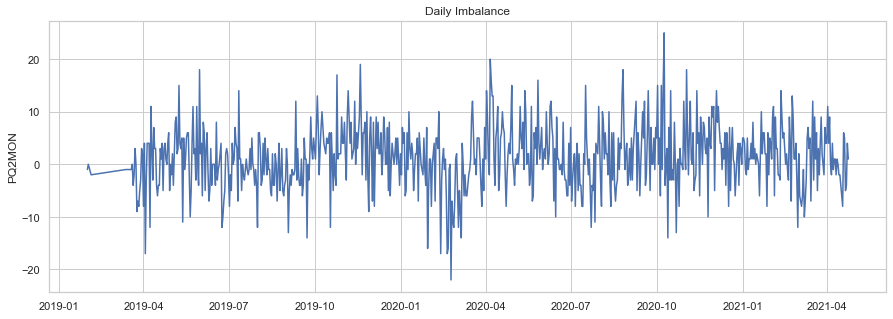

In [135]:
df_0 = df_res.loc[:,"PQ2MON"]
plt.figure(figsize=(15,5))
plt.title("Daily Imbalance")
sns.lineplot(data=df_0,)

In [136]:
df_0 = df_res
df_1 = df_0.copy()
for i in range(len(df_0)):
    df_1.iloc[i,:] = df_0.iloc[:i+1,:].sum(numeric_only=True, axis=0)

df_1

,ABNE,ABNEDM,ABNI,ABNW,ABSCAL,ABSRUR,ATLCML,BC2INE,BC2INW,BC2ISL,...,USSEN,USSES,USSWCC,USSWCN,USSWCS,USWIGR,USWIN,USWIS,USWIW,Total
2019-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,-22.0,-1201.0,20.0,-16.0,-1490.0,329.0,-66.0,-2.0,-224.0,-36.0,...,96.0,175.0,52.0,10.0,655.0,800.0,31.0,47.0,5.0,0.0
2021-04-21,-22.0,-1202.0,20.0,-16.0,-1491.0,330.0,-66.0,-2.0,-224.0,-36.0,...,96.0,176.0,52.0,10.0,657.0,800.0,31.0,47.0,5.0,0.0
2021-04-22,-22.0,-1203.0,20.0,-16.0,-1489.0,332.0,-66.0,-2.0,-224.0,-36.0,...,96.0,177.0,52.0,10.0,658.0,800.0,32.0,46.0,5.0,0.0
2021-04-23,-22.0,-1202.0,20.0,-16.0,-1490.0,332.0,-66.0,-2.0,-224.0,-36.0,...,96.0,176.0,52.0,10.0,658.0,800.0,32.0,46.0,6.0,0.0


<AxesSubplot:title={'center':'Cumulative Imbalance'}, ylabel='PQ2MON'>

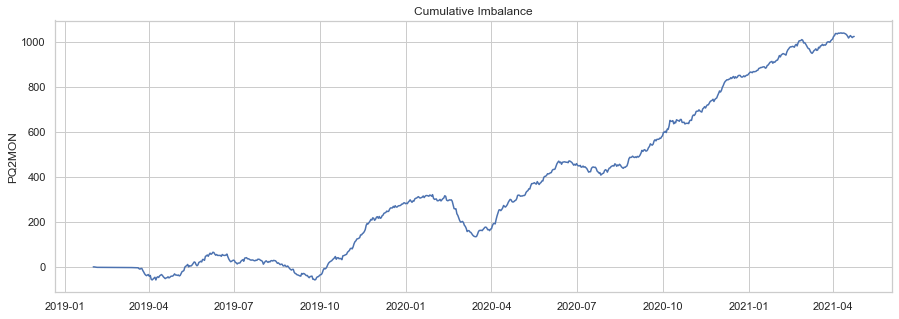

In [137]:
df_2 = df_1.loc[:,"PQ2MON"]
plt.figure(figsize=(15,5))
plt.title("Cumulative Imbalance")
sns.lineplot(data=df_2)

In [178]:
# firstDate = min(df_combine.index)
# lastDate = max(df_combine.index)
# df_combine["Day #"] = [(date - startDate).days for date in df_combine.index]
# df_combine

,Outgoing,Incoming,Imbalance,cImbalance,Day #
2019-01-31,1,0,-1,-1,0
2019-02-01,1,0,-1,-2,1
2019-02-04,3,0,-3,-5,4
2019-03-13,2,0,-2,-7,41
2019-03-19,5,0,-5,-12,47
...,...,...,...,...,...
2021-04-20,36,44,8,-94,810
2021-04-21,28,46,18,-76,811
2021-04-22,21,54,33,-43,812
2021-04-23,12,44,32,-11,813


In [7]:
start_dates = dict(sorted(Counter(DF['Start Date']).items(), key=lambda x: x[0]))
start_dates

completion_dates = dict(sorted(Counter(DF['Completion Date']).items(), key=lambda x: x[0]))
completion_dates

deltas = dict()
keys = set(start_dates.keys()) | set(completion_dates.keys())
for key in keys:
    cnt1 = 0 if key not in start_dates.keys() else start_dates[key]
    cnt2 = 0 if key not in completion_dates.keys() else completion_dates[key]
    deltas[key] = cnt2 - cnt1

deltas = dict(sorted(deltas.items(), key=lambda x: x[0]))
deltas

{Timestamp('2019-01-31 00:00:00'): -1,
 Timestamp('2019-02-01 00:00:00'): -1,
 Timestamp('2019-02-04 00:00:00'): -3,
 Timestamp('2019-03-13 00:00:00'): -2,
 Timestamp('2019-03-19 00:00:00'): -5,
 Timestamp('2019-03-20 00:00:00'): -4,
 Timestamp('2019-03-21 00:00:00'): -8,
 Timestamp('2019-03-22 00:00:00'): -21,
 Timestamp('2019-03-23 00:00:00'): -9,
 Timestamp('2019-03-24 00:00:00'): -1,
 Timestamp('2019-03-25 00:00:00'): -8,
 Timestamp('2019-03-26 00:00:00'): -7,
 Timestamp('2019-03-27 00:00:00'): -3,
 Timestamp('2019-03-28 00:00:00'): 1,
 Timestamp('2019-03-29 00:00:00'): -6,
 Timestamp('2019-03-30 00:00:00'): 3,
 Timestamp('2019-03-31 00:00:00'): 7,
 Timestamp('2019-04-01 00:00:00'): -1,
 Timestamp('2019-04-02 00:00:00'): 1,
 Timestamp('2019-04-03 00:00:00'): -3,
 Timestamp('2019-04-04 00:00:00'): -12,
 Timestamp('2019-04-05 00:00:00'): 2,
 Timestamp('2019-04-06 00:00:00'): 2,
 Timestamp('2019-04-07 00:00:00'): 0,
 Timestamp('2019-04-08 00:00:00'): 14,
 Timestamp('2019-04-09 00:00:0